<a href="https://colab.research.google.com/github/annaklaracss/data_science-/blob/main/Data_Science_testando_hip%C3%B3teses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# carregando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#Leitura dos dados

# idade de aponsentadoria
dados_idade_aposentadoria = pd.read_csv("/content/dados_idade_aposentadoria.csv")

# Tempo de Vida de uma Lâmpada
dados_vida_lampada = pd.read_csv("/content/dados_vida_lampada.csv")

# Altura dos funcionarios
dados_alturas = pd.read_csv("/content/dados_alturas.csv")

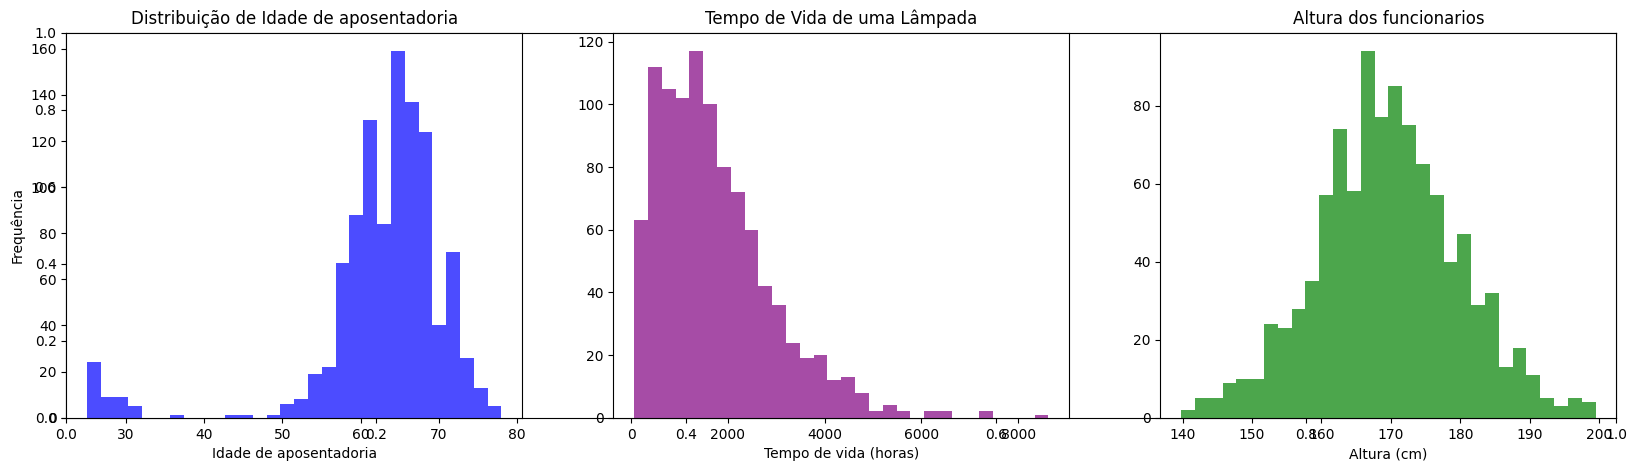

In [6]:
plt.subplots(figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição de Idade de aposentadoria')
plt.xlabel('Idade de aposentadoria')
plt.ylabel('Frequência')
plt.hist(dados_idade_aposentadoria, bins=30 , alpha=0.7, color= 'blue')


plt.subplot(132)
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel('Tempo de vida (horas)')
plt.hist(dados_vida_lampada, bins=30 , alpha=0.7, color= 'purple')

plt.subplot(133)
plt.title('Altura dos funcionarios')
plt.xlabel('Altura (cm)')
plt.hist(dados_alturas, bins=30 , alpha=0.7, color= 'green')


plt.show()




O código plt.subplot(131) é usado no Matplotlib para criar uma grade de subplots (múltiplos gráficos) dentro de uma única figura.

Vamos quebrar o significado dos números:
1: Indica o número de linhas na grade de subplots. Neste caso, há 1 linha.
3: Indica o número de colunas na grade de subplots. Neste caso, há 3 colunas.
1: Indica o índice do subplot atual. Neste caso, é o primeiro subplot na grade. Os índices começam em 1 e aumentam da esquerda para a direita e de cima para baixo.

Então, plt.subplot(131) cria uma grade de 1 linha por 3 colunas e ativa o primeiro subplot para que você possa plotar nele. Se você quisesse plotar no segundo subplot da mesma grade, usaria plt.subplot(132), e assim por diante.



In [7]:
#reamostragem

#tamanho da amostra
n=100

#quantidade de amostras
qnt=10000

#função de reamostragem e calculo de médias
def reamostragem_medias(dados, coluna,n, qnt):
  medias = [dados[coluna].sample(n, replace = True).mean() for _ in range(qnt)]
  return medias

Reamostragem" (Resampling em inglês) é um termo genérico que se refere a diversas técnicas utilizadas em estatística e aprendizado de máquina para extrair amostras repetidamente de um conjunto de dados existente.

Em resumo, a reamostragem é uma ferramenta poderosa e versátil que permite aos estatísticos e cientistas de dados explorar a variabilidade dos dados, testar hipóteses, validar modelos e lidar com desafios específicos, como o desequilíbrio de classes, de forma mais robusta e eficiente.

In [8]:
dados_idade_aposentadoria.head()#para saber o nome da coluna

,idade
0,66
1,66
2,60
3,61
4,57


In [9]:
dados_vida_lampada.head() #para saber o nome da coluna

,duracao
0,2238.462196
1,404.474833
2,358.025869
3,2193.463611
4,1072.377941


In [10]:
dados_alturas.head() #para saber o nome da coluna

,alturas
0,167.52
1,185.21
2,172.74
3,171.52
4,157.75


In [11]:
#realizando a reamostragem com função

media_idade= reamostragem_medias(dados_idade_aposentadoria, 'idade', n, qnt)
media_duracao = reamostragem_medias(dados_vida_lampada, 'duracao', n, qnt)
media_altura = reamostragem_medias(dados_alturas, 'alturas', n, qnt)



In [12]:
print('***** Medias populacionais *****')

print('idade',dados_idade_aposentadoria['idade'].mean())
print('duracao',dados_vida_lampada['duracao'].mean())
print('alturas',dados_alturas['alturas'].mean())

***** Medias populacionais *****
idade 62.70857142857143
duracao 1731.8036029420002
alturas 169.52022


In [13]:
#medias amostrais
def Average(list):
  return sum(list) / len(list)

print('***** Medias populacionais *****')

print('idade',Average(media_idade))
print('duracao',Average(media_duracao))
print('alturas',Average(media_altura))



***** Medias populacionais *****
idade 62.71533900000014
duracao 1732.9045746355268
alturas 169.50475787999952


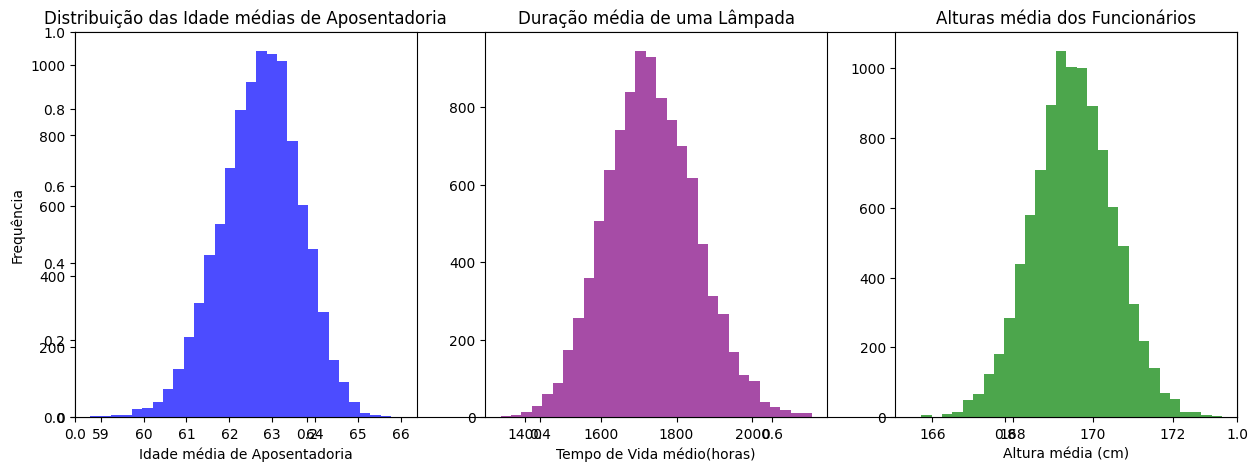

In [14]:
#como as medias estão distribuidas?

plt.subplots(figsize=(15, 5))
plt.subplot(131)
plt.title('Distribuição das Idade médias de Aposentadoria')
plt.xlabel('Idade média de Aposentadoria')
plt.ylabel('Frequência')
plt.hist(media_idade, bins=30, alpha=0.7, color='blue')

plt.subplot(132)
plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')

plt.subplot(133)
plt.hist(media_altura, bins=30, alpha=0.7, color='green')
plt.title('Alturas média dos Funcionários')
plt.xlabel('Altura média (cm)')

plt.show()

teorema do limite central. Esse teorema é famoso na estatística para fazermos inferências, ou seja, generalizar a partir de uma amostra para uma população.


In [15]:
# média da nova amostra
media_nova_amostra = 1200

In [16]:
# media original
media_populacional = dados_vida_lampada['duracao'].mean()

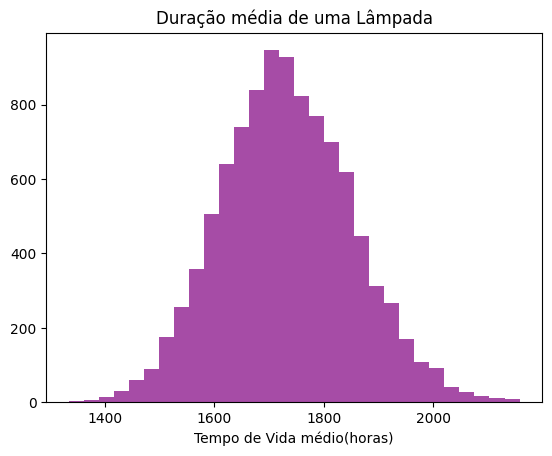

In [17]:
# Quão distante essa média está do comportamento?

plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio(horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [18]:
# transformando medias_duração em DataFrame
duracao_amostras = pd.DataFrame({'medias_duracao': media_duracao})

In [19]:
# calculando informações
media_das_medias = duracao_amostras['medias_duracao'].mean()
EP = duracao_amostras['medias_duracao'].std()

print("*****  Medidas amostrais *****")
print("média:", media_das_medias )
print("Erro Padrão:", EP )

*****  Medidas amostrais *****
média: 1732.9045746355239
Erro Padrão: 119.85430494634596


In [20]:
# Quantos erros?
1732 - EP

1612.145695053654

In [21]:
# Quantos erros?
1732 - 3*EP

1372.4370851609622

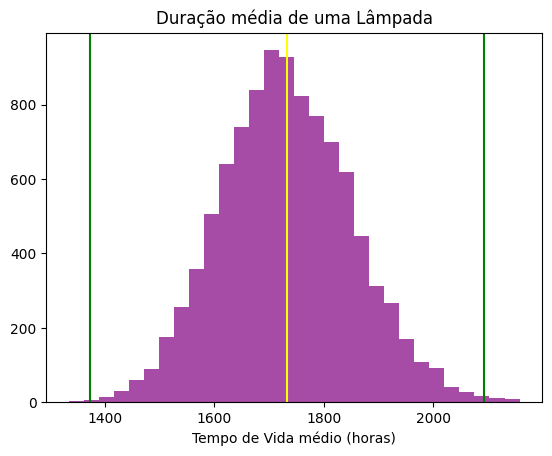

In [22]:
# Visualizando a quantidade de amostras entre 3EP +- da média.

plt.hist(media_duracao, bins=30, alpha=0.7, color='purple')
plt.title('Duração média de uma Lâmpada')
plt.xlabel('Tempo de Vida médio (horas)')
plt.axvline(media_das_medias, color = "yellow")#colocando a linha (media) no grafico
plt.axvline(media_das_medias + 3*EP , color = "green")#colocando a linha (erro padrao) no grafico
plt.axvline(media_das_medias - 3*EP , color = "green")#colocando a linha (erro padrao) no grafico
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [23]:
#quanto está no intervalo de +ou- dois desvio
qnt_obs = duracao_amostras[(duracao_amostras > media_das_medias - 3*EP) &
                          (duracao_amostras < media_das_medias + 3*EP)]


In [24]:
# quanto isso representa?
qnt_obs.count()/duracao_amostras.count()


,0
medias_duracao,0.9963


In [25]:
# quanto isso representa?
qnt_obs.count()/duracao_amostras.count()*100

,0
medias_duracao,99.63


In [26]:
# importando o stats
from scipy import stats

In [27]:
# levar em consideração essa amostra
dados_vida_lampada

# nível de confiança definido
confianca = 0.95

In [28]:
#informações para  calcular o IC

media = dados_vida_lampada['duracao'].mean()
desvio_padrao_amostral = dados_vida_lampada['duracao'].std()
tamanho_amostra = len(dados_vida_lampada)

In [29]:
# Calculando intervalo de confiança

intervalo_confianca = stats.norm.interval(confianca,
                                       loc=media ,
                                       scale=desvio_padrao_amostral/np.sqrt(tamanho_amostra)) #variabilidade do intervalo




In [30]:
# Visualizando os resultados

print("IC (95%):", intervalo_confianca)

IC (95%): (np.float64(1658.3741665835485), np.float64(1805.233039300452))


Atividade 1;

In [31]:
import pandas as pd

# Conjunto de dados TechTaste
df_techtaste = pd.DataFrame({'avaliacoes': [38, 44, 33, 42, 47, 33, 36, 39, 42, 36, 39, 34, 42, 42, 36, 43, 31, 35, 36, 41, 42, 30, 25, 38, 47, 36, 32, 45, 44, 45, 37, 48, 37, 36, 44, 49, 31, 45, 45, 40, 36, 50, 38, 34, 36, 42, 46, 49, 36, 34, 38, 31, 53, 40, 57, 40, 36, 42, 26, 50, 32, 43, 35, 37, 42, 30, 36, 43, 40, 43, 44, 52, 37, 51, 35, 47, 40, 50, 37, 49]})

In [32]:
df_techtaste.head()

,avaliacoes
0,38
1,44
2,33
3,42
4,47


In [33]:
#calculando o desvio padrao
desvio_padrao =  df_techtaste['avaliacoes'].std()
print(desvio_padrao)

6.421827887581661


In [34]:
#calculando a media
media = df_techtaste['avaliacoes'].mean()
print(media)

40.025


In [35]:
import numpy as np

In [36]:
# Calcula o tamanho da amostra
n = len('avaliacoes')
print(n)

10


In [37]:
# Calcula o erro padrão da média
erro_padrao_media = desvio_padrao / np.sqrt(n) #np.sqrt calcula a raiz quadrada do tamanho da amostra
print(erro_padrao_media)

2.030760286634578


In [38]:
import matplotlib.pyplot as plt

In [39]:
avaliacoes = np.array(df_techtaste)

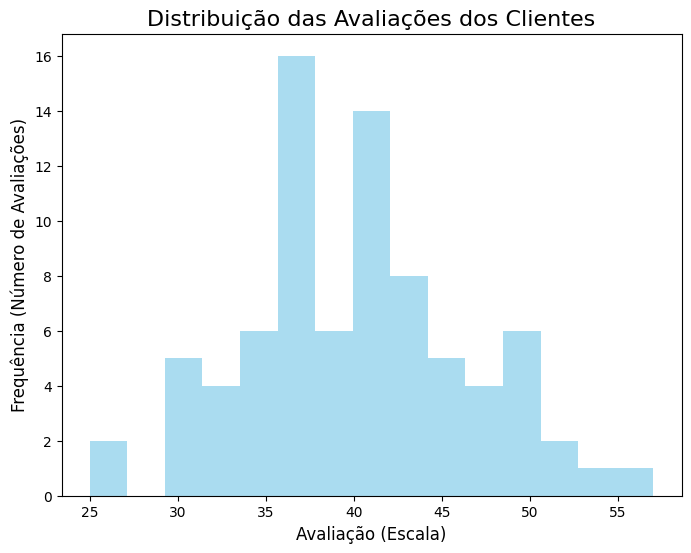

In [40]:
# Visualizando a distribuição das avaliações dos clientes.

plt.subplots(figsize=(8, 6))
plt.hist(avaliacoes, bins= 15, alpha=0.7, color='skyblue')
plt.title('Distribuição das Avaliações dos Clientes', fontsize=16)
plt.xlabel('Avaliação (Escala)', fontsize=12)
plt.ylabel('Frequência (Número de Avaliações)', fontsize=12)


plt.show()

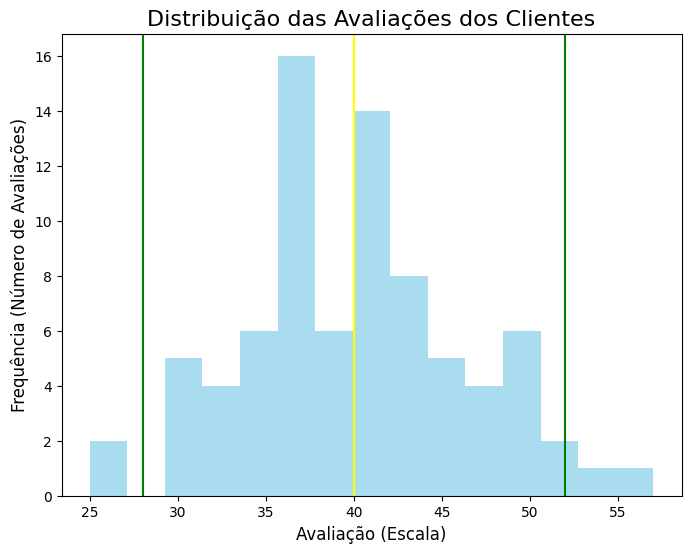

In [41]:
# Visualizando a distribuição das avaliações dos clientes.

plt.subplots(figsize=(8, 6))
plt.hist(avaliacoes, bins= 15, alpha=0.7, color='skyblue')
plt.title('Distribuição das Avaliações dos Clientes', fontsize=16)
plt.xlabel('Avaliação (Escala)', fontsize=12)
plt.ylabel('Frequência (Número de Avaliações)', fontsize=12)
plt.axvline(media, color = "yellow")#colocando a linha (media) no grafico
plt.axvline(media + 0.1*EP , color = "green")#colocando a linha (erro padrao) no grafico
plt.axvline(media - 0.1*EP , color = "green")#colocando a linha (erro padrao) no grafico

plt.show()

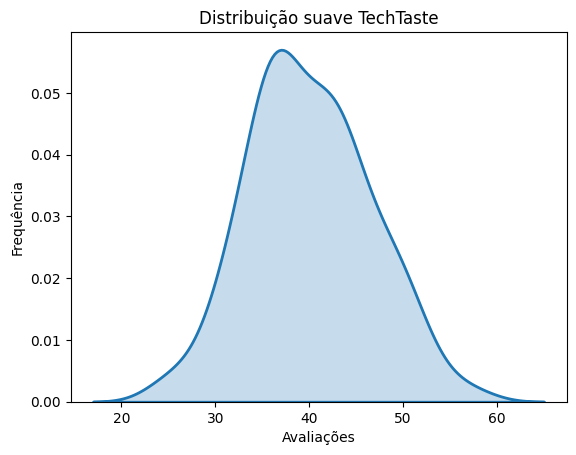

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df_techtaste['avaliacoes'], linewidth=2, fill= True)

plt.xlabel('Avaliações')
plt.ylabel('Frequência')
plt.title('Distribuição suave TechTaste')
plt.show()

In [43]:
confianca= 0.90
intervalo_confianca = stats.norm.interval(confianca,
                                       loc=media ,
                                       scale=desvio_padrao/np.sqrt(n)) #variabilidade do intervalo
print(intervalo_confianca)

(np.float64(36.6846965770601), np.float64(43.365303422939895))


In [44]:
confianca= 0.95
intervalo_confianca = stats.norm.interval(confianca,
                                       loc=media ,
                                       scale=desvio_padrao/np.sqrt(n)) #variabilidade do intervalo
print(intervalo_confianca)

(np.float64(36.04478297696199), np.float64(44.00521702303801))


A largura do intervalo de confiança seria afetada se o nível de confiança fosse aumentado de 90% para 95%. Na verdade, o intervalo de confiança se tornaria mais largo

FORMULANDO HIPOTESE

In [45]:
hipotese = 1570

In [46]:
#dados amostrais

lamapadas_natalinas = pd.read_csv("/content/experimento_lampadas_natalinas.csv")


In [47]:
#para saber o nome da coluna do data frame

lamapadas_natalinas.head()


,Unnamed: 0,duracao
0,0,1541.121474
1,1,1523.495329
2,2,1521.732707
3,3,1523.280091
4,4,1530.643374


In [48]:
#media amostral de duração das lampadas

lamapadas_natalinas['duracao'].mean()

np.float64(1529.5081310675512)

In [49]:
# calculando o intervalo de confianca
# informações dadas pela industria

confianca = 0.95
desvio_padrao_populacional = 105
tamando_da_amostra = len(lamapadas_natalinas['duracao'])


In [50]:
# calculando o intervalo de confiança

intervalo = stats.norm.interval(confianca,
                                loc=1570,
                                scale= desvio_padrao_populacional/np.sqrt(tamando_da_amostra))

In [51]:
print('IC(95%):', intervalo)

IC(95%): (np.float64(1549.4203781623294), np.float64(1590.5796218376706))


Não temos prova que o valor da hipotese realmente funciona. Visto que, o valor contido não esta no intervalo.
Então nos resta rejeitar a proposta.

In [52]:
# quando estabelecemos o criterio de confiança estabelecemos a porcentagem que podemos errar.
# ou seja, se o nivel de confiança for de 95, podemos errar ate 5% de erro.
# Onde de fato ela não ira durar esses 1570


In [53]:
#existem dois tipos de erros, sendo eles;
# Erro do tipo 1: ocorre quando a hipótese nula é rejeitada quando, na verdade, ela é verdadeira.
#  Em outras palavras, o erro é cometido ao rejeitar uma verdade.

# Erro do tipo 2: ocorre quando a hipótese nula não é rejeitada quando, na verdade, ela é falsa.
# Em outras palavras, o erro é cometido ao não rejeitar uma falsidade.

# O erro do tipo 1 é conhecido pela letra Alpha e o erro do tipo 2 é conhecido como a letra Betha.



In [54]:
#importando o teste z do stantsmodels
from statsmodels.stats.weightstats import ztest

In [55]:
# executando o teste

stats,p_valor= ztest(x1=lamapadas_natalinas['duracao'], value=1570, alternative= 'two-sided')



In [56]:
#media_amostral
lamapadas_natalinas['duracao'].mean()

np.float64(1529.5081310675512)

In [57]:
print('{:.4f}'.format(p_valor))

0.0000


In [58]:
# verifica a hipótese nula com base no valor-p

if p_valor < 0.05:
    conclusao = "Rejeitar a hipótese nula"
else:
    conclusao = "Não rejeita a hipótese nula"

print("Conclusão:", conclusao)

Conclusão: Rejeitar a hipótese nula


teste bilateral procura evidências em ambas as direções (superior e inferior)  enquanto o teste unilateral procura evidências em apenas uma direção mas pode ser para esquerda ou direita.


Conseguimos facilmente identificar esse tipo de teste quando a hipótese alternativa indica que a média é diferente de um valor específico. Vamos verificar um exemplo de hipótese:

Hipótese Nula (H0): A média é igual a 20.
Hipótese Alternativa (H1): A média é diferente de 20.


teste unilateral a direita ou teste unilateral superior (media maior que o valor especifico).

teste unilateral a esquerda ou teste unilateral inferior (media menor que o valor especifico)

In [59]:
# Tempo de resposta em minutos para 25 solicitações de suporte
tempo_resposta = [28, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 29, 31, 30, 33, 28, 30, 31, 29,
                  30, 32, 24, 29, 30]

In [60]:
np.mean(tempo_resposta)

np.float64(29.96)

In [61]:
#importando o comando para testar a hipotese
from scipy.stats import ttest_1samp

In [62]:
#realizando o teste unilateral na amostra
t_statistic, p_valor = ttest_1samp(tempo_resposta, 30, alternative= 'less')

In [63]:
print(p_valor)

0.4585970095667924


In [64]:
print(t_statistic)

-0.10506930292746224


Também conhecido como “Teste t de Student” devido ao nome de seu criador, o Teste t é usado para testar hipóteses quando você tem condições específicas que justificam seu uso. Ele é particularmente aplicável em situações onde:

Tamanho da amostra é pequeno: Geralmente, o teste t é usado quando o tamanho da amostra (n) é menor que 30. Isso se deve à necessidade de compensar a incerteza adicional introduzida quando se estima a variância da população a partir de uma pequena amostra.
Desvio padrão populacional é desconhecido: Diferentemente do teste Z, o teste t é utilizado quando o desvio padrão da população não é conhecido e precisa ser estimado a partir dos dados da amostra. Essa é uma situação comum na prática, pois raramente se conhece o desvio padrão da população.
A amostra é aleatória e as observações são independentes: Assim como no teste Z, é importante que a amostra seja aleatória e que as observações dentro da amostra sejam independentes umas das outras para garantir a validade do teste.
A distribuição da população é aproximadamente normal ou o tamanho da amostra é suficientemente grande: Embora o teste t seja robusto para pequenos desvios da normalidade, especialmente à medida que o tamanho da amostra aumenta, ele se baseia na suposição de que os dados seguem uma distribuição normal. Para amostras muito pequenas, essa suposição torna-se mais crítica.

Ao todo existem três tipos de Teste t:

Teste t para uma amostra: é usado para testar a hipótese sobre o valor da média amostral.
Teste t para duas amostras independentes: permite testar a hipótese sobre a diferença entre as médias de duas amostras independentes.
Teste t para duas amostras pareadas (ou amostras relacionadas): é usado para investigar a hipótese sobre a média de uma amostra testada duas vezes.

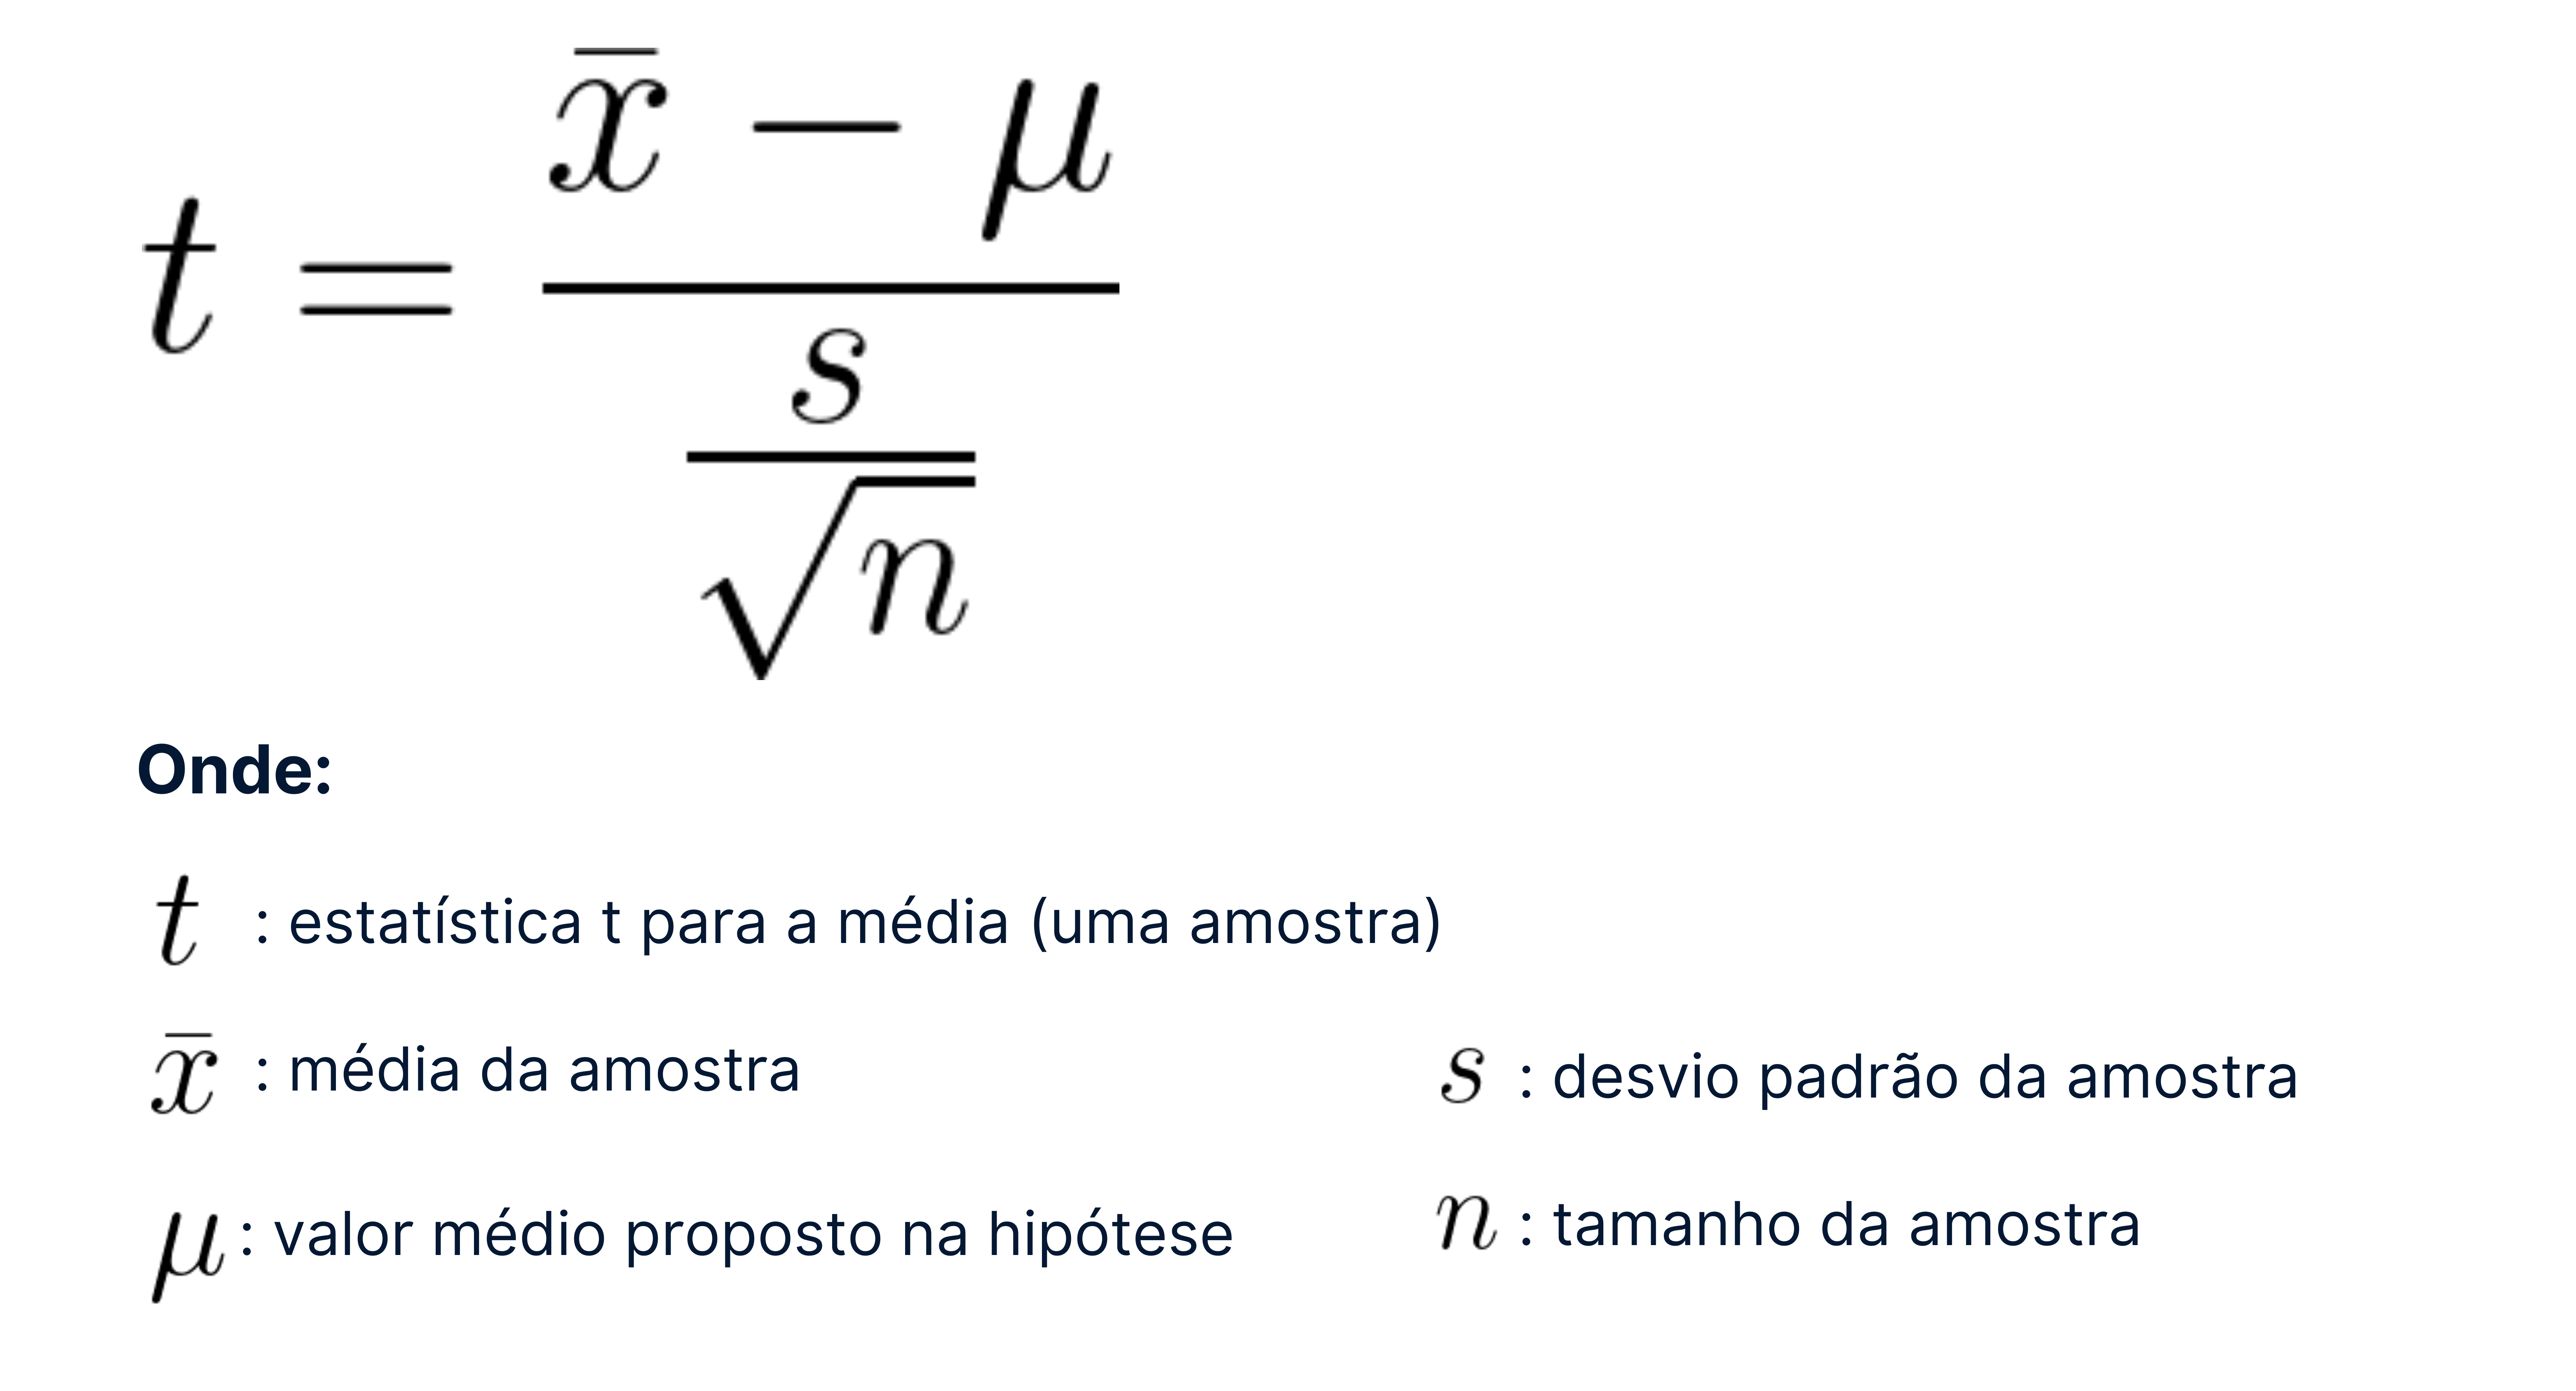

Se o p-valor é menor que o nível de significância, rejeitamos a hipótese nula em favor da hipótese alternativa. Pois indica que há evidências estatísticas suficientes para suportar a hipótese alternativa.
Se o p-valor é maior que o nível de significância, não rejeitamos a hipótese nula. Isso indica uma falta de evidência estatística para sustentar a hipótese alternativa.

Teste Bilateral: a hipótese nula é rejeitada se o valor absoluto da estatística t for maior que o valor crítico.
Teste Unilateral à direita: a hipótese nula é rejeitada se a estatística t for maior que o valor crítico.
Teste Unilateral à esquerda: a hipótese nula é rejeitada se a estatística t for menor que o valor crítico. Indica uma diferença significativa na direção desejada.

In [65]:
vendas_com_propaganda = [329.80, 291.70, 338.86, 391.38, 285.95, 285.95, 394.75, 346.05, 271.83, 332.55, 272.19, 272.06, 314.52, 185.20, 196.50, 266.26, 239.23, 318.85, 245.52, 215.26, 387.94, 286.45, 304.05, 214.52, 267.34, 306.66, 230.94, 322.54, 263.96, 282.50, 263.90, 411.14, 299.19, 236.54, 349.35, 226.75, 312.53, 182.42, 220.31, 311.81, 344.31, 310.28, 293.66, 281.93, 211.29, 256.81, 272.36, 363.43, 320.62, 194.22]

In [66]:
vendas_sem_propaganda = [304.44, 261.89, 244.38, 321.70, 346.86, 348.08, 234.65, 266.45, 304.88, 343.53, 256.25, 273.86, 218.62, 213.23, 333.75, 366.37, 280.68, 345.21, 306.70, 246.29, 306.68, 377.28, 282.85, 378.88, 127.82, 334.31, 290.22, 267.06, 290.51, 165.74, 271.82, 306.43, 373.67, 253.90, 236.49, 254.89, 339.92, 304.73, 253.21, 315.80, 292.80, 343.12, 242.88, 265.34, 261.47, 197.19, 302.77, 300.66, 285.31, 270.92]

In [67]:
#media de vendas com propaganda

print(np.mean(vendas_com_propaganda))

286.4832


In [68]:
#media de vendas propaganda

print(np.mean(vendas_sem_propaganda))

286.2498


Visualmente a diferença de medias não é tão grande. Mas ainda sim, pode ser.
por isso precisamos rodar um teste T para analisar os dados e ver se a diferença é mesmo grande.

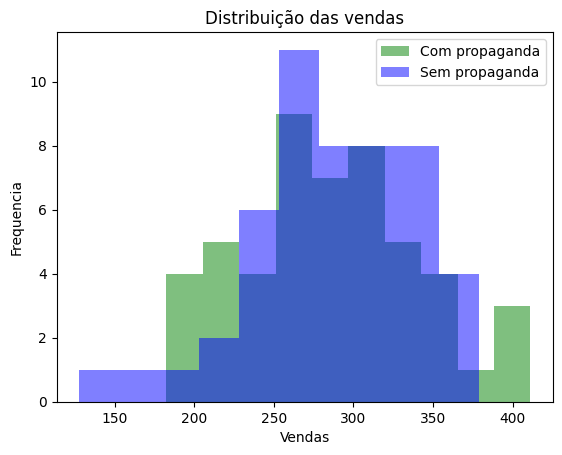

In [69]:
#criação do histograma
plt.hist(vendas_com_propaganda, color= 'green', alpha= 0.5, label= "Com propaganda")
plt.hist(vendas_sem_propaganda, color= 'blue', alpha= 0.5, label= "Sem propaganda")

#adicionando os titulos
plt.xlabel('Vendas')
plt.ylabel('Frequencia')
plt.title('Distribuição das vendas')
plt.legend()
plt.show()



precisamos rodar um teste de independÊncia



In [70]:
#teste T para amostras independentes
from scipy.stats import ttest_ind

In [71]:
#aplicação do test T student para amostras independentes
stats, p_valor = ttest_ind(vendas_com_propaganda, vendas_sem_propaganda, alternative= 'greater') #alternative = greater indica o tipo de hipotese. que nesse caso é maior.

In [72]:
#exibição dos resultados
print('Estatística t:', stats)
print('p-valor:', p_valor)

Estatística t: 0.021471690993471577
p-valor: 0.49145652153110797


In [73]:
#interpretação dos resultados
alpha = 0.05
if p_valor < alpha:
    print("Rejeitar a hipótese nula: Há evidências de que a propaganda tem um efeito positivo nas vendas.")
else:
    print("Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas devido à propaganda.")

Não rejeita hipótese nula: Não há evidências suficientes para afirmar um efeito positivo nas vendas devido à propaganda.


In [74]:
antes_do_treinamento =[78, 65, 75, 80, 85, 88, 79, 81, 76, 84]
apos_o_treinamento = [85, 70, 75, 87, 90, 92, 84, 82, 76, 91]

In [75]:
# Comparando antes e depois
resultado_subtracao = [b - a for a, b in zip(antes_do_treinamento,apos_o_treinamento)]

In [76]:
resultado_subtracao

[7, 5, 0, 7, 5, 4, 5, 1, 0, 7]

In [77]:
from scipy.stats import ttest_rel

In [78]:
ttest_rel(apos_o_treinamento, antes_do_treinamento )

TtestResult(statistic=np.float64(4.619361962060379), pvalue=np.float64(0.001255488323544788), df=np.int64(9))

Hipóteses desse teste de amostras pareadas:

H0 : µd = 0

H1 : µd > 0

µd é média das diferenças dos pares.

In [79]:
stats, p_valor = ttest_rel(apos_o_treinamento, antes_do_treinamento, alternative="greater")

In [80]:
print(p_valor)

0.000627744161772394


In [83]:
from scipy.stats import ttest_rel

In [86]:
#Aplicando o teste t pareado
stas, p_valor = ttest_rel(apos_o_treinamento, antes_do_treinamento )

In [89]:
print(p_valor) #rejeitamos a hipotese nula porque n'ao tivemos diferença

0.001255488323544788
